In [21]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']

In [28]:
filter_method = 'trendfilter'
system = 'Duffing'
n_states = 2
noise_lvl = 0.1
## READ JSON FILE
filename = system+'_'+filter_method+'_lcurve_noise_'+str(noise_lvl).replace('.','d')+'.json'
filepath = 'data_files/'+system+'/'+filter_method+'/'+filename
with open(filepath) as f:
  lcurve_dict = json.load(f)

## READ JSON FILE
filename = system+'_'+filter_method+'_gcv_noise_'+str(noise_lvl).replace('.','d')+'.json'
filepath = 'data_files/'+system+'/'+filter_method+'/'+filename
with open(filepath) as f:
  gcv_dict = json.load(f)

In [29]:
##PLOTTING STYLES
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

210.44950422135304
0.015986777069864806
1.5218672930452564
9.463528419916857e-05
415.44956069880584
0.015519889364862347
1.489295229342729
0.0002339178495923966


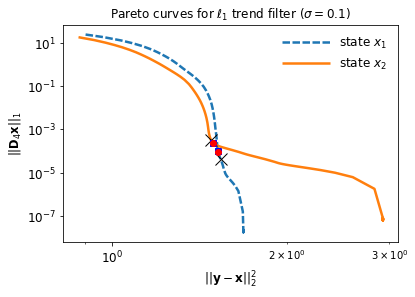

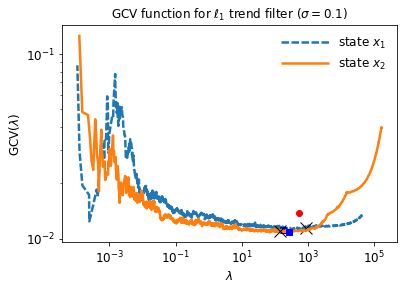

In [36]:
plt.close('all')
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()



for state in range(n_states):

    res = lcurve_dict[f'state{state+1}:residual']
    reg = lcurve_dict[f'state{state+1}:regularizer']
    res_lc = lcurve_dict[f'state{state+1}:res_corner']
    reg_lc = lcurve_dict[f'state{state+1}:reg_corner']
    res_min = lcurve_dict[f'state{state+1}:res_min']
    reg_min = lcurve_dict[f'state{state+1}:reg_min']
    res_gcv = lcurve_dict[f'state{state+1}:res_gcv']
    reg_gcv = lcurve_dict[f'state{state+1}:reg_gcv']
    lambda_lc = lcurve_dict[f'state{state+1}:lambda_lc']
    gcv_lc = lcurve_dict[f'state{state+1}:gcv_lc']
    print(lambda_lc)
    print(gcv_lc)
    lambdas = gcv_dict[f'state{state+1}:lambdas']
    gcv_lambda = gcv_dict[f'state{state+1}:gcv_func']
    lambda_lc = gcv_dict[f'state{state+1}:lambda_lcurve']
    gcv_lc = gcv_dict[f'state{state+1}:gcv_lcurve']
    min_error_gcv_lambda = gcv_dict[f'state{state+1}:min_error_lambda']
    min_error_gcv_gcv = gcv_dict[f'state{state+1}:min_error_gcv']
    min_gcv_lambda = gcv_dict[f'state{state+1}:min_lambda']
    min_gcv = gcv_dict[f'state{state+1}:min_gcv']   
    res_gcv = gcv_dict[f'state{state+1}:res_gcv']
    reg_gcv = gcv_dict[f'state{state+1}:reg_gcv']
    print(res_gcv)
    print(reg_gcv)

    
    #Normalize
    
    
    ax1.plot(res, reg, lw=2.5,dashes=dashesStyles[state%len(dashesStyles)],label=f'state $x_{state+1}$')
    ax1.plot(res_min, reg_min,'kx', markersize = 12)
    ax1.plot(res_gcv, reg_gcv, 'bs')
    ax1.plot(res_lc, reg_lc, 'ro')
    
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_ylabel("$||\mathbf{D}_4\mathbf{x}||_1$", size = 11.5)
    ax1.set_xlabel("$||\mathbf{y} - \mathbf{x}||_2^2$", size = 12)
    ax1.legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
    ax1.tick_params(labelsize = 12)
    ax1.yaxis.tick_left()
    nameOfPlot = f"Pareto curves for $\ell_1$ trend filter ($\sigma = {noise_lvl}$)"
    ax1.set_title(nameOfPlot, size = 12)
    ax1.legend(frameon=False, loc='upper right',ncol=1,handlelength=4, fontsize = 12)
    
    
    ax2.plot(lambdas[0:], gcv_lambda[0:], lw=2.5,dashes=dashesStyles[state%len(dashesStyles)],label=f'state $x_{state+1}$')
    ax2.plot(min_error_gcv_lambda, min_error_gcv_gcv,'kx', markersize = 12)
    ax2.plot(min_gcv_lambda, min_gcv, 'bs')
    ax2.plot(lambda_lc, gcv_lc, 'ro')
    
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_ylabel("GCV($\lambda$)", size = 12)
    ax2.set_xlabel("$\lambda$", size = 12)
    ax2.tick_params(labelsize = 12)
    ax2.yaxis.tick_left()
    nameOfPlot = f"GCV function for $\ell_1$ trend filter ($\sigma = {noise_lvl}$)"
    ax2.set_title(nameOfPlot, size = 12)
    ax2.legend(frameon=False, loc='upper right',ncol=1,handlelength=4, fontsize = 12)

In [39]:
fig_format = 'svg'
filename = f'Duffing_'+filter_method+'_lcurve_noise_'+str(noise_lvl).replace('.','d')+'.'+fig_format
fig1.savefig(filename, format=fig_format, dpi=600)

In [40]:
fig_format = 'svg'
filename = f'Duffing_'+filter_method+'_gcv_noise_'+str(noise_lvl).replace('.','d')+'.'+fig_format
fig2.savefig(filename, format=fig_format, dpi=600)